<a href="https://colab.research.google.com/github/BhavikBuchke/Cisco-Data-science-program/blob/main/Data%20visualization/Banknote%20Dimensions%20Project/banknote%20dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banknote dimensions

Which banknotes exhibit the greatest size differences between denominations? Which are the largest overall?

Banknote dimensions differ widely across countries.

The size of a banknote impacts its practicality. Uniform dimensions enhance durability by ensuring a snug wallet fit, while also enabling vending machines and ATMs to process them seamlessly. Conversely, varied sizes assist the visually impaired in distinguishing denominations, though smaller notes can pose challenges for machine sorting and counting.

Striking a balance between these considerations is essential in currency design.

The file `banknote-dimensions.csv` shows the `length` and `width` in millimeters for 42 currencies. This dataset spans all 22 subregions and sub-subregions of the world, as defined by the United Nations Statistics Division's geoscheme.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'banknote-dimensions.csv'.

from google.colab import files
uploaded = files.upload()

Saving banknote-dimensions.csv to banknote-dimensions (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('banknote-dimensions.csv')
df

,currency,code,value,length,width
0,Argentine Peso,ARS,2,155.0,65.0
1,Argentine Peso,ARS,5,155.0,65.0
2,Argentine Peso,ARS,10,155.0,65.0
3,Argentine Peso,ARS,20,155.0,65.0
4,Argentine Peso,ARS,50,155.0,65.0
...,...,...,...,...,...
245,West African Franc,XOF,500,114.0,60.0
246,West African Franc,XOF,1000,125.0,66.0
247,West African Franc,XOF,2000,130.0,65.0
248,West African Franc,XOF,5000,140.0,74.0


In [3]:
# longest and shortest banknotes for each currency
# modify the code below if you are more interested in width
length = df.groupby('currency').agg(max=('length', 'max'), min=('length', 'min')).reset_index()
length['diff'] = length['max'] - length['min']
length.head()

,currency,max,min,diff
0,Argentine Peso,155.0,155.0,0.0
1,Australian Dollar,158.0,130.0,28.0
2,Bangladeshi Taka,155.0,100.0,55.0
3,Bolivian Boliviano,140.0,140.0,0.0
4,Canadian Dollar,152.4,152.4,0.0


In [4]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='center', ha='left')

### Project Ideas

- Generate paired scatter plots to compare the `length` of the longest and shortest banknotes for each currency.

- Create similar paired scatter plots, but for `width` instead of `length`.

- Incorporate the Pro Tips into your visualizations.

- Add labels to data points to highlight key insights or narrate a compelling story.

- Calculate the percentage of currencies where:
	- Only the `length` remains consistent across all denominations.
	- Only the `width` remains consistent across all denominations.
	- Both `length` and `width` vary with denominations.
	- All denominations share identical `length` and `width` dimensions.

- Visualize these findings in a clear, engaging format.

Below is a preliminary paired scatter plot of banknote length to serve as a starting point.

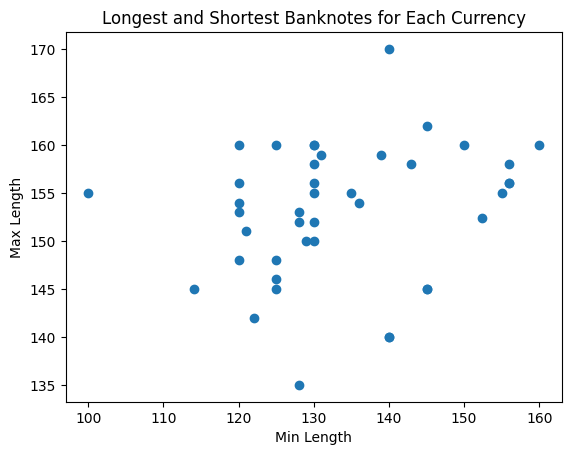

In [5]:
# Scatter plots to compare the length of the longest and shortest banknotes for each currency.
plt.scatter(length['min'], length['max'])
plt.xlabel('Min Length')
plt.ylabel('Max Length')
plt.title('Longest and Shortest Banknotes for Each Currency')
plt.show()

In [6]:
# Widest and narrowest banknotes for each currency
width = df.groupby('currency').agg(max=('width', 'max'), min=('width', 'min')).reset_index()
width['diff'] = width['max'] - width['min']
width.head()

,currency,max,min,diff
0,Argentine Peso,65.00,65.00,0.0
1,Australian Dollar,72.50,65.00,7.5
2,Bangladeshi Taka,65.00,60.00,5.0
3,Bolivian Boliviano,70.00,70.00,0.0
4,Canadian Dollar,69.85,69.85,0.0


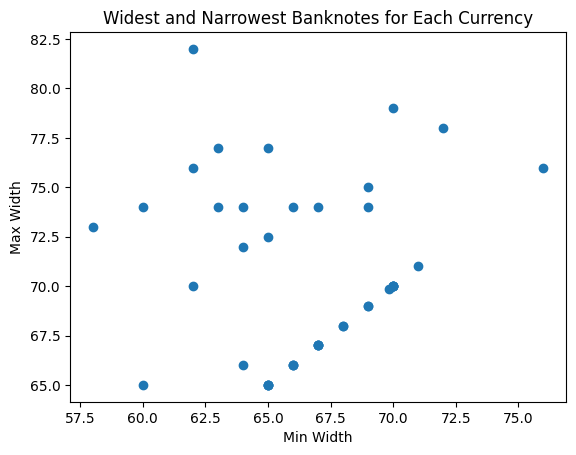

In [7]:
# Scatter plots to compare the width of the widest and narrowest banknotes for each currency.
plt.scatter(width['min'], width['max'])
plt.xlabel('Min Width')
plt.ylabel('Max Width')
plt.title('Widest and Narrowest Banknotes for Each Currency')
plt.show()

# Incorporate the Pro Tips into visualizations.

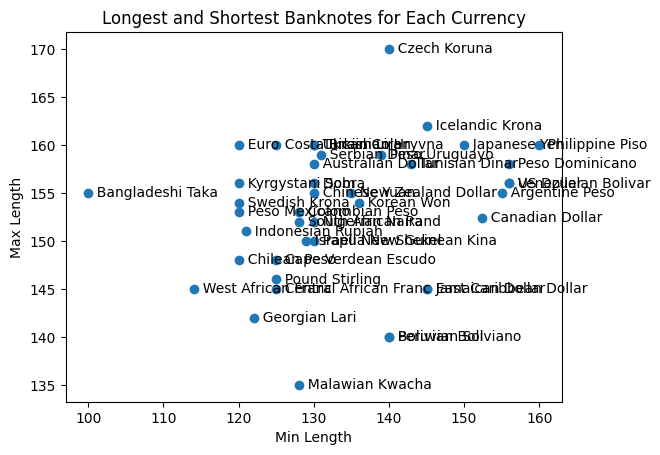

In [8]:
# Solution 1
# Add labels to data points to highlight key insights or narrate a compelling story.
plt.scatter(length['min'], length['max'])
plt.xlabel('Min Length')
plt.ylabel('Max Length')
plt.title('Longest and Shortest Banknotes for Each Currency')
add_labels(length, 'min', 'max', 'currency')
plt.show()

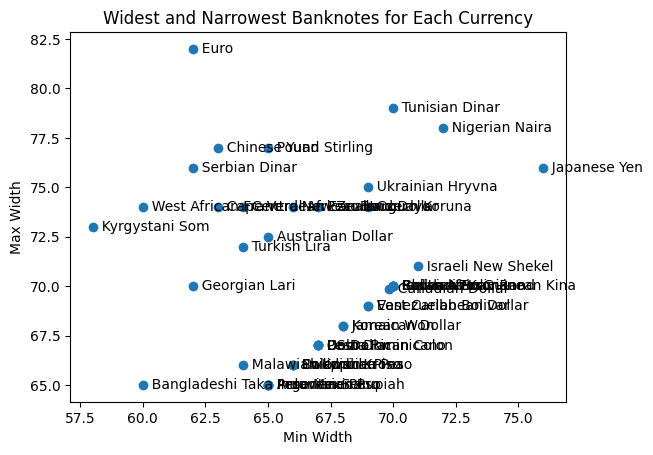

In [9]:
# solution 2
plt.scatter(width['min'], width['max'])
plt.xlabel('Min Width')
plt.ylabel('Max Width')
plt.title('Widest and Narrowest Banknotes for Each Currency')
add_labels(width, 'min', 'max', 'currency')
plt.show()

In [10]:
# Calculate the percentage of currencies where: Only the length remains consistent across all denominations.
total_currencies = length['currency'].value_counts().sum()
print(f'Total currency is : {total_currencies}')

consistent_length = len(length[length['diff'] == 0])
print(f'The currency with consistent length is : {consistent_length}')
percentage_length = (consistent_length/total_currencies)*100
print(f'The percentage of currencies where only the length remains consistent across all denominations is : {percentage_length:.2f}%')

Total currency is : 42
The currency with consistent length is : 9
The percentage of currencies where only the length remains consistent across all denominations is : 21.43%


In [11]:
# Calculate the percentage of currencies where: Only the width remains consistent across all denominations.
consistent_width = len(width[width['diff'] == 0])
percentage_width = (consistent_width/total_currencies)*100
print(f'The currency with consistent width is : {consistent_width}')
print(f'Total currency is : {total_currencies}')
print(f'The percentage of currencies where only the width remains consistent across all denominations is : {percentage_width:.2f}%')

The currency with consistent width is : 23
Total currency is : 42
The percentage of currencies where only the width remains consistent across all denominations is : 54.76%


In [12]:
merged = pd.merge(length,width, on = 'currency', suffixes = ('_length', '_width'))
merged.head( )

,currency,max_length,min_length,diff_length,max_width,min_width,diff_width
0,Argentine Peso,155.0,155.0,0.0,65.00,65.00,0.0
1,Australian Dollar,158.0,130.0,28.0,72.50,65.00,7.5
2,Bangladeshi Taka,155.0,100.0,55.0,65.00,60.00,5.0
3,Bolivian Boliviano,140.0,140.0,0.0,70.00,70.00,0.0
4,Canadian Dollar,152.4,152.4,0.0,69.85,69.85,0.0


In [13]:
# Calculate the percentage of currencies where: Both length and width vary with denominations.
both_vary = len(merged[(merged['diff_length'] != 0.0) & (merged['diff_width'] != 0.0)])
percentage_both_vary = (both_vary / total_currencies) * 100
print(f'No. of currencies where both length and width vary: {both_vary}')
print(f'The percentage of currencies where both length and width vary: {percentage_both_vary:.2f}%')

No. of currencies where both length and width vary: 19
The percentage of currencies where both length and width vary: 45.24%


In [14]:
# Calculate the percentage of currencies where: All denominations share identical length and width dimensions.
identical = len(merged[(merged['diff_length'] == 0.0) & (merged['diff_width'] == 0.0)])
identical_percentage = (identical / total_currencies) * 100
print(f'No. of currencies with identical length and width: {identical}')
print(f'The percentage of currencies where both length and width are identical: {identical_percentage:.2f}% ')

No. of currencies with identical length and width: 9
The percentage of currencies where both length and width are identical: 21.43% 


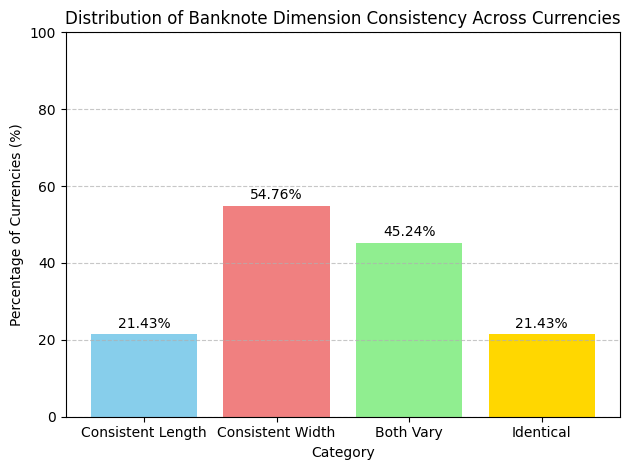

In [15]:
# Plotting findings.
x = ['Consistent Length', 'Consistent Width', 'Both Vary', 'Identical']
y = [percentage_length, percentage_width, percentage_both_vary, identical_percentage]

plt.bar(x, y, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Category')
plt.ylabel('Percentage of Currencies (%)')
plt.title('Distribution of Banknote Dimension Consistency Across Currencies')

# Add percentage labels to the bars (helped by Ai)
for index, value in enumerate(y):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom') # Adjust positioning for vertical bars
plt.ylim(0, 100) # Ensure y-axis (percentage) goes from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid on y-axis for vertical bars
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()